# Set Up

In [1]:
import xarray as xr
import numpy as np
import torch
import random
# import gcsfs
# from google.oauth2.credentials import Credentials
from scipy import linalg
import xarray as xr
# import gcsfs
import matplotlib.pyplot as plt

In [2]:
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

/home.ufs/tm3076/swot_SUM03/miniconda3/envs/swot_python12_pytorch/lib/python3.9/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11070). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
PERSISTENT_BUCKET = './data'
unfiltered_link = PERSISTENT_BUCKET + '/unfilt_u_v_ssh_sst.nc'
filtered_link = PERSISTENT_BUCKET+'/filt_u_v_ssh.nc'
da_unfiltered = xr.open_dataset(unfiltered_link)[["ssh_unfiltered","u_unfiltered","v_unfiltered"]]
da_filtered = xr.open_dataset(filtered_link)[["ssh_filtered","u_filtered","v_filtered"]]

ssh_it = da_unfiltered['ssh_unfiltered'].values - da_filtered['ssh_filtered']
u_it = da_unfiltered['u_unfiltered'].values - da_filtered['u_filtered']
v_it = da_unfiltered['v_unfiltered'].values - da_filtered['v_filtered']
da_it = xr.Dataset({'ssh_it': ssh_it,'u_it': u_it,'v_it': v_it})

In [4]:
ssh_it

<xarray.DataArray 'ssh_filtered' (time: 70, i: 2160, j: 2160)> Size: 1GB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates: (12/13)
  * i        (i) int64 17kB 1080 1081 1082 1083 1084 ... 3236 3237 3238 3239
  * j        (j) float64 17kB 0.0 1.0 2.0 3.0 ... 2.157e+03 2.158e+03 2.159e+03
  * time     (time) int64 560B 0 86400 172800 259200 ... 5788800 5875200 5961600
    x0       (i) float64 17kB ...
    y0       (j) float64 17kB ...
    z0       float64 8B ...
    ...       ...
    x        (j, i) float32 19MB ...
    y        (j, i) float32 19MB ...
    Depth    (j, i) float32 19MB ...
    XC       (j, i) float32 19MB ...
    YC       (j, i) float32 19MB ...
    RAC      (j, i) float32 19MB ...
Attributes:
    units:      meters
    long_name:  Lagrangian filtered steric sea surface height

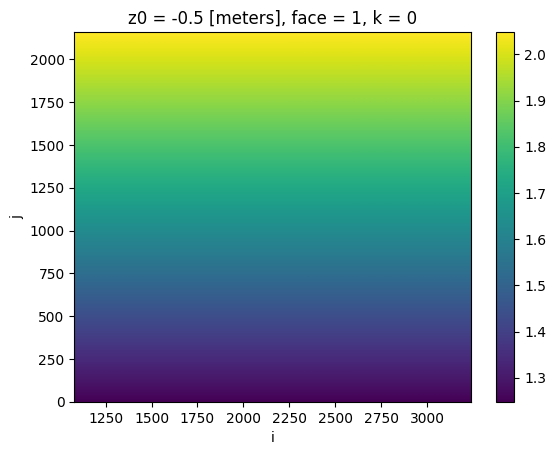

In [5]:
(da_unfiltered.XC.diff('i')*110*np.cos(da_unfiltered.YC.mean('i')*np.pi/180)).plot()

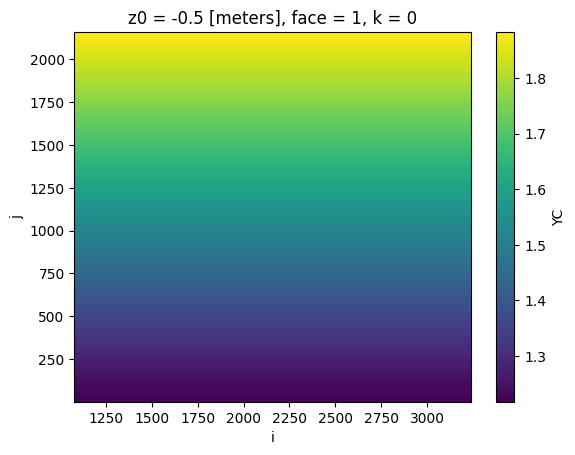

In [6]:
(da_unfiltered.YC.diff('j')*110).plot()

# Region Selection

In [7]:
data_dict = {}

# Process and store DataArrays for whole region
data_dict['ssh'] = da_unfiltered.ssh_unfiltered.transpose('time','i','j').fillna(0)
data_dict['bm'] = da_filtered.ssh_filtered.transpose('time','i','j')
data_dict['ubm'] = da_it.ssh_it.transpose('time','i','j')

# Process and store DataArrays for region A
data_dict['regionA_ssh'] = da_unfiltered.ssh_unfiltered.transpose('time','i','j').isel(i=slice(1100,2100),j=slice(400,1400))[:,:1000,:1000].fillna(0)
data_dict['regionA_bm'] = da_filtered.ssh_filtered.transpose('time','i','j').isel(i=slice(1100,2100),j=slice(400,1400))[:,:1000,:1000].fillna(0)
data_dict['regionA_ubm'] = da_it.ssh_it.transpose('time','i','j').isel(i=slice(1100,2100),j=slice(400,1400))[:,:1000,:1000].fillna(0)

# Process and store DataArrays for region B
data_dict['regionB_ssh'] = da_unfiltered.ssh_unfiltered.transpose('time','i','j').isel(i=slice(50,1050),j=slice(1100,2100))[:,:1000,:1000].fillna(0)
data_dict['regionB_bm'] = da_filtered.ssh_filtered.transpose('time','i','j').isel(i=slice(50,1050),j=slice(1100,2100))[:,:1000,:1000].fillna(0)
data_dict['regionB_ubm'] = da_it.ssh_it.transpose('time','i','j').isel(i=slice(50,1050),j=slice(1100,2100))[:,:1000,:1000].fillna(0)

In [8]:
def generate_tile_locations(height, width, patch_size):
    locations = []
    for top in range(0, height - patch_size + 1, patch_size):
        for left in range(0, width - patch_size + 1, patch_size):
            locations.append((top, left))
    return locations

def generate_patches_batch(data, patch_locations, patch_size=80):
    time_steps = data.shape[0]
    patches_list = []
    for t in range(time_steps):
        time_patches = []
        for top, left in patch_locations:
            patch = data[t, top:top+patch_size, left:left+patch_size]
            time_patches.append(patch)
        patches_list.append(np.array(time_patches))
    return np.array(patches_list)

def generate_all_patches(data_dict, patch_size=80):
    result_dict = {}
    
    # Process each dataset independently with its own patch locations
    for key, da in data_dict.items():
        print(f"Processing {key}...")
        data = da.values
        time_steps, height, width = data.shape
        
        # Generate patch locations specific to this dataset's dimensions
        patch_locations = generate_tile_locations(height, width, patch_size)
        
        patches = generate_patches_batch(data, patch_locations, patch_size)
        result_dict[key] = patches
    
    return result_dict

patch_dict = generate_all_patches(data_dict)

for key, patches in patch_dict.items():
    print(f"{key} shape: {patches.shape}")

Processing ssh...
Processing bm...
Processing ubm...
Processing regionA_ssh...
Processing regionA_bm...
Processing regionA_ubm...
Processing regionB_ssh...
Processing regionB_bm...
Processing regionB_ubm...
ssh shape: (70, 729, 80, 80)
bm shape: (70, 729, 80, 80)
ubm shape: (70, 729, 80, 80)
regionA_ssh shape: (70, 144, 80, 80)
regionA_bm shape: (70, 144, 80, 80)
regionA_ubm shape: (70, 144, 80, 80)
regionB_ssh shape: (70, 144, 80, 80)
regionB_bm shape: (70, 144, 80, 80)
regionB_ubm shape: (70, 144, 80, 80)


In [9]:
def split_and_reshape_data(patch_dict):
    train_dict, val_dict, test_dict = {}, {}, {}
    
    for key, data in patch_dict.items():            
        # Split time dimension
        train = data[:60]  
        val = data[60:65]  
        test = data[65:]   
        
        # Reshape: combine time and patch dimensions
        train_dict[key] = train.reshape(-1, 80, 80) 
        val_dict[key] = val.reshape(-1, 80, 80)     
        test_dict[key] = test.reshape(-1, 80, 80)   
    
    return train_dict, val_dict, test_dict

train_data, val_data, test_data = split_and_reshape_data(patch_dict)

In [10]:
ssh_train_xr = xr.DataArray(train_data['ssh'], dims=('sample','i', 'j'), coords={'sample': range(43740), 'i': range(80), 'j': range(80)})
bm_train_xr = xr.DataArray(train_data['bm'], dims=('sample','i', 'j'), coords={'sample': range(43740), 'i': range(80), 'j': range(80)})
ubm_train_xr = xr.DataArray(train_data['ubm'], dims=('sample','i', 'j'), coords={'sample': range(43740), 'i': range(80), 'j': range(80)})

ssh_val_xr = xr.DataArray(val_data['ssh'], dims=('sample','i', 'j'), coords={'sample': range(3645), 'i': range(80), 'j': range(80)})
bm_val_xr = xr.DataArray(val_data['bm'], dims=('sample','i', 'j'), coords={'sample': range(3645), 'i': range(80), 'j': range(80)})
ubm_val_xr = xr.DataArray(val_data['ubm'], dims=('sample','i', 'j'), coords={'sample': range(3645), 'i': range(80), 'j': range(80)})

ssh_test_xr = xr.DataArray(test_data['ssh'], dims=('sample','i', 'j'), coords={'sample': range(3645), 'i': range(80), 'j': range(80)})
bm_test_xr = xr.DataArray(test_data['bm'], dims=('sample','i', 'j'), coords={'sample': range(3645), 'i': range(80), 'j': range(80)})
ubm_test_xr = xr.DataArray(test_data['ubm'], dims=('sample','i', 'j'), coords={'sample': range(3645), 'i': range(80), 'j': range(80)})


ssh_train_xr_A = xr.DataArray(train_data['regionA_ssh'], dims=('sample','i', 'j'), coords={'sample': range(8640), 'i': range(80), 'j': range(80)})
bm_train_xr_A = xr.DataArray(train_data['regionA_bm'], dims=('sample','i', 'j'), coords={'sample': range(8640), 'i': range(80), 'j': range(80)})
ubm_train_xr_A = xr.DataArray(train_data['regionA_ubm'], dims=('sample','i', 'j'), coords={'sample': range(8640), 'i': range(80), 'j': range(80)})

ssh_val_xr_A = xr.DataArray(val_data['regionA_ssh'], dims=('sample','i', 'j'), coords={'sample': range(720), 'i': range(80), 'j': range(80)})
bm_val_xr_A = xr.DataArray(val_data['regionA_bm'], dims=('sample','i', 'j'), coords={'sample': range(720), 'i': range(80), 'j': range(80)})
ubm_val_xr_A = xr.DataArray(val_data['regionA_ubm'], dims=('sample','i', 'j'), coords={'sample': range(720), 'i': range(80), 'j': range(80)})

ssh_test_xr_A = xr.DataArray(test_data['regionA_ssh'], dims=('sample','i', 'j'), coords={'sample': range(720), 'i': range(80), 'j': range(80)})
bm_test_xr_A = xr.DataArray(test_data['regionA_bm'], dims=('sample','i', 'j'), coords={'sample': range(720), 'i': range(80), 'j': range(80)})
ubm_test_xr_A = xr.DataArray(test_data['regionA_ubm'], dims=('sample','i', 'j'), coords={'sample': range(720), 'i': range(80), 'j': range(80)})


ssh_train_xr_B = xr.DataArray(train_data['regionB_ssh'], dims=('sample','i', 'j'), coords={'sample': range(8640), 'i': range(80), 'j': range(80)})
bm_train_xr_B = xr.DataArray(train_data['regionB_bm'], dims=('sample','i', 'j'), coords={'sample': range(8640), 'i': range(80), 'j': range(80)})
ubm_train_xr_B = xr.DataArray(train_data['regionB_ubm'], dims=('sample','i', 'j'), coords={'sample': range(8640), 'i': range(80), 'j': range(80)})

ssh_val_xr_B = xr.DataArray(val_data['regionB_ssh'], dims=('sample','i', 'j'), coords={'sample': range(720), 'i': range(80), 'j': range(80)})
bm_val_xr_B = xr.DataArray(val_data['regionB_bm'], dims=('sample','i', 'j'), coords={'sample': range(720), 'i': range(80), 'j': range(80)})
ubm_val_xr_B = xr.DataArray(val_data['regionB_ubm'], dims=('sample','i', 'j'), coords={'sample': range(720), 'i': range(80), 'j': range(80)})

ssh_test_xr_B = xr.DataArray(test_data['regionB_ssh'], dims=('sample','i', 'j'), coords={'sample': range(720), 'i': range(80), 'j': range(80)})
bm_test_xr_B = xr.DataArray(test_data['regionB_bm'], dims=('sample','i', 'j'), coords={'sample': range(720), 'i': range(80), 'j': range(80)})
ubm_test_xr_B = xr.DataArray(test_data['regionB_ubm'], dims=('sample','i', 'j'), coords={'sample': range(720), 'i': range(80), 'j': range(80)})

# ZCA

In [11]:
import numpy as np
from scipy.linalg import svd

def calculate_zca_params(data, epsilon=1e-9):
    """Compute ZCA parameters without large matrices."""
    # Reshape data to 2D and handle NaNs
    data_flat = data.reshape((data.shape[0], -1))
    n_samples = data_flat.shape[0]
    
    # Compute mean ignoring NaNs and center data
    mask = ~np.isnan(data_flat)
    mean = np.nanmean(data_flat, axis=0)
    data_centered = data_flat - mean
    
    # Impute NaNs with 0 (equivalent to mean imputation)
    data_centered[~mask] = 0
    
    # Compute SVD of the centered data matrix (n_samples x n_features)
    _, S, Vt = svd(data_centered, full_matrices=False)
    
    # Compute scaling factors for eigenvalues
    scale = np.sqrt(n_samples - 1) / np.sqrt(S**2 + epsilon * (n_samples - 1))
    
    return Vt, scale, mean

def apply_zca_whitening(data, Vt, scale, mean):
    """Apply ZCA whitening without large matrices."""
    original_shape = data.shape
    data_flat = data.reshape((data.shape[0], -1))
    
    # Handle NaNs and center data
    mask = ~np.isnan(data_flat)
    data_centered = data_flat - mean
    data_centered[~mask] = 0  # Impute NaNs with mean
    
    # Apply transformation in 3 steps
    transformed = data_centered @ Vt.T  # (1) Project to PCA space
    transformed *= scale                # (2) Scale components
    whitened = transformed @ Vt         # (3) Project back to original space
    
    # Restore original NaNs and shape
    whitened[~mask] = np.nan
    return whitened.reshape(original_shape)

In [35]:
# For 'bm' data:
zca_Vt_bm, zca_scale_bm, zca_mean_bm = calculate_zca_params(train_data['bm'])

# zca_Vt_bm has shape (6400, 6400), so we use dims 'd1' and 'd2' each with length 6400.
zca_Vt_xr_bm = xr.DataArray(zca_Vt_bm, dims=('d1', 'd2'), coords={'d1': range(6400), 'd2': range(6400)})

# zca_scale_bm and zca_mean_bm each have length 6400.
zca_scale_xr_bm = xr.DataArray(zca_scale_bm, dims=('d',), coords={'d': range(6400)})
zca_mean_xr_bm = xr.DataArray(zca_mean_bm, dims=('d',), coords={'d': range(6400)})

# The whitened data retains the sample shape (43740, 54, 54).
bm_train_zca = apply_zca_whitening(train_data['bm'], zca_Vt_bm, zca_scale_bm, zca_mean_bm)
bm_zca_xr = xr.DataArray(bm_train_zca, dims=('sample', 'i', 'j'), 
                           coords={'sample': range(43740), 'i': range(80), 'j': range(80)})

# For 'ubm' data:
zca_Vt_ubm, zca_scale_ubm, zca_mean_ubm = calculate_zca_params(train_data['ubm'])

zca_Vt_xr_ubm = xr.DataArray(zca_Vt_ubm, dims=('d1', 'd2'), coords={'d1': range(6400), 'd2': range(6400)})
zca_scale_xr_ubm = xr.DataArray(zca_scale_ubm, dims=('d',), coords={'d': range(6400)})
zca_mean_xr_ubm = xr.DataArray(zca_mean_ubm, dims=('d',), coords={'d': range(6400)})

ubm_train_zca = apply_zca_whitening(train_data['ubm'], zca_Vt_ubm, zca_scale_ubm, zca_mean_ubm)
ubm_zca_xr = xr.DataArray(ubm_train_zca, dims=('sample', 'i', 'j'), 
                           coords={'sample': range(43740), 'i': range(80), 'j': range(80)})


In [27]:
train_data['ssh'].shape

(43740, 80, 80)

In [25]:
val_data['ssh'].shape

(3645, 80, 80)

In [29]:
zca_Vt_bm.shape

(3645, 6400)

In [41]:
zca_mean_bm.shape

(6400,)

In [42]:
# For 'bm' data:
zca_Vt_bm, zca_scale_bm, zca_mean_bm = calculate_zca_params(val_data['bm'])

# zca_Vt_bm has shape (6400, 6400), so we use dims 'd1' and 'd2' each with length 6400.
zca_Vt_xr_bm = xr.DataArray(zca_Vt_bm, dims=('d1', 'd2'), coords={'d1': range(3645), 'd2': range(6400)})

# zca_scale_bm and zca_mean_bm each have length 6400.
zca_scale_xr_bm = xr.DataArray(zca_scale_bm, dims=('d',), coords={'d': range(3645)})
zca_mean_xr_bm = xr.DataArray(zca_mean_bm, dims=('d',), coords={'d': range(6400)})

# The whitened data retains the sample shape (3645, 54, 54).
bm_val_zca = apply_zca_whitening(val_data['bm'], zca_Vt_bm, zca_scale_bm, zca_mean_bm)
bm_val_zca_xr = xr.DataArray(bm_val_zca, dims=('sample', 'i', 'j'), 
                           coords={'sample': range(3645), 'i': range(80), 'j': range(80)})


# For 'ubm' data:
zca_Vt_ubm, zca_scale_ubm, zca_mean_ubm = calculate_zca_params(val_data['ubm'])

zca_Vt_xr_ubm = xr.DataArray(zca_Vt_ubm, dims=('d1', 'd2'), coords={'d1': range(3645), 'd2': range(6400)})
zca_scale_xr_ubm = xr.DataArray(zca_scale_ubm, dims=('d',), coords={'d': range(3645)})
zca_mean_xr_ubm = xr.DataArray(zca_mean_ubm, dims=('d',), coords={'d': range(6400)})

ubm_val_zca = apply_zca_whitening(val_data['ubm'], zca_Vt_ubm, zca_scale_ubm, zca_mean_ubm)
ubm_val_zca_xr = xr.DataArray(ubm_val_zca, dims=('sample', 'i', 'j'), 
                           coords={'sample': range(3645), 'i': range(80), 'j': range(80)})


In [46]:
# For 'bm' data:
zca_Vt_bm, zca_scale_bm, zca_mean_bm = calculate_zca_params(test_data['bm'])

# zca_Vt_bm has shape (6400, 6400), so we use dims 'd1' and 'd2' each with length 6400.
zca_Vt_xr_bm = xr.DataArray(zca_Vt_bm, dims=('d1', 'd2'), coords={'d1': range(3645), 'd2': range(6400)})

# zca_scale_bm and zca_mean_bm each have length 6400.
zca_scale_xr_bm = xr.DataArray(zca_scale_bm, dims=('d',), coords={'d': range(3645)})
zca_mean_xr_bm = xr.DataArray(zca_mean_bm, dims=('d',), coords={'d': range(6400)})

# The whitened data retains the sample shape (3645, 54, 54).
bm_test_zca = apply_zca_whitening(test_data['bm'], zca_Vt_bm, zca_scale_bm, zca_mean_bm)
bm_test_zca_xr = xr.DataArray(bm_test_zca, dims=('sample', 'i', 'j'), 
                           coords={'sample': range(3645), 'i': range(80), 'j': range(80)})


# For 'ubm' data:
zca_Vt_ubm, zca_scale_ubm, zca_mean_ubm = calculate_zca_params(test_data['ubm'])

zca_Vt_xr_ubm = xr.DataArray(zca_Vt_ubm, dims=('d1', 'd2'), coords={'d1': range(3645), 'd2': range(6400)})
zca_scale_xr_ubm = xr.DataArray(zca_scale_ubm, dims=('d',), coords={'d': range(3645)})
zca_mean_xr_ubm = xr.DataArray(zca_mean_ubm, dims=('d',), coords={'d': range(6400)})

ubm_test_zca = apply_zca_whitening(test_data['ubm'], zca_Vt_ubm, zca_scale_ubm, zca_mean_ubm)
ubm_test_zca_xr = xr.DataArray(ubm_test_zca, dims=('sample', 'i', 'j'), 
                           coords={'sample': range(3645), 'i': range(80), 'j': range(80)})


In [43]:
# zca_Vt_bm, zca_scale_bm, zca_mean_bm = calculate_zca_params(train_data['bm'])
# zca_Vt_xr_bm = xr.DataArray(zca_Vt_bm, dims=('n', 'd'), coords={'n': range(43740), 'd': range(2916)})
# zca_scale_xr_bm = xr.DataArray(zca_scale_bm, dims=('n',), coords={'n': range(43740)})
# zca_mean_xr_bm = xr.DataArray(zca_mean_bm, dims=('d',), coords={'d': range(2916)})
# bm_train_zca = apply_zca_whitening(train_data['bm'], zca_Vt_bm, zca_scale_bm, zca_mean_bm)
# bm_zca_xr = xr.DataArray(bm_train_zca, dims=('sample', 'i', 'j'), coords={'sample': range(43740), 'i': range(80), 'j': range(80)})


# zca_Vt_ubm, zca_scale_ubm, zca_mean_ubm = calculate_zca_params(train_data['ubm'])
# zca_Vt_xr_ubm = xr.DataArray(zca_Vt_ubm, dims=('n', 'd'), coords={'n': range(43740), 'd': range(2916)})
# zca_scale_xr_ubm = xr.DataArray(zca_scale_ubm, dims=('n',), coords={'n': range(43740)})
# zca_mean_xr_ubm = xr.DataArray(zca_mean_ubm, dims=('d',), coords={'d': range(2916)})
# ubm_train_zca = apply_zca_whitening(train_data['ubm'], zca_Vt_ubm, zca_scale_ubm, zca_mean_ubm)
# ubm_zca_xr = xr.DataArray(ubm_train_zca, dims=('sample', 'i', 'j'), coords={'sample': range(43740), 'i': range(80), 'j': range(80)})

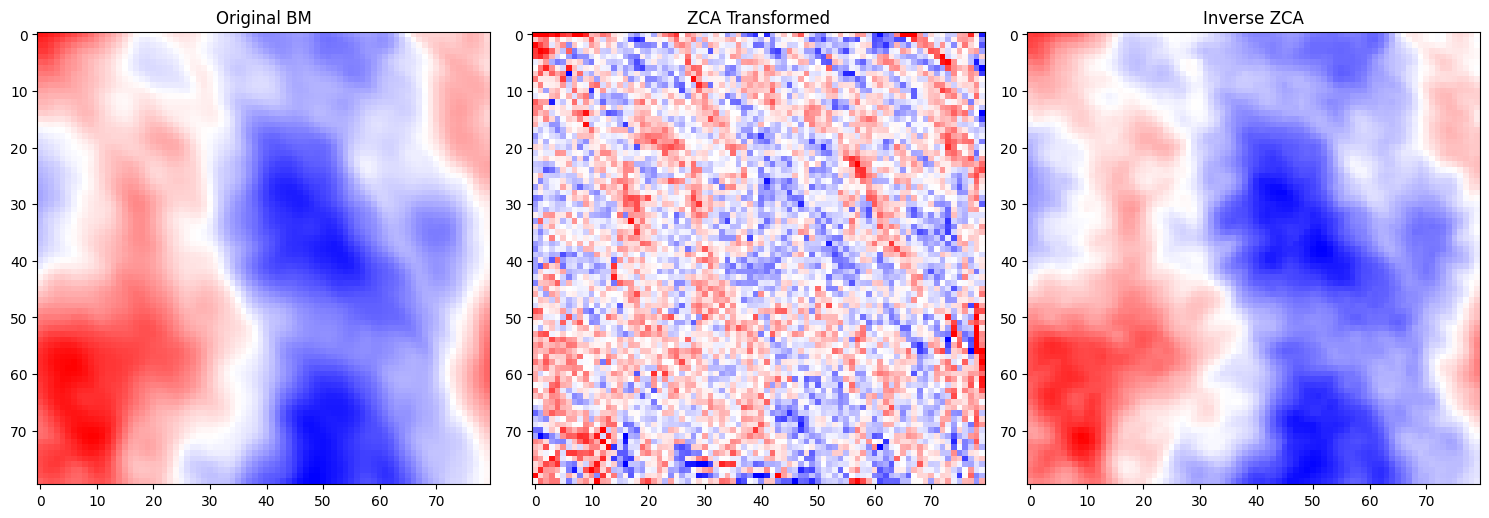

Maximum reconstruction error: 8.05e-03


In [44]:
import matplotlib.pyplot as plt

def inverse_zca_whitening(whitened_data, Vt, scale, mean):
    """Inverse ZCA transformation using memory-efficient components"""
    # Reshape and handle NaNs
    original_shape = whitened_data.shape
    whitened_flat = whitened_data.reshape((whitened_data.shape[0], -1))
    
    # Store NaN mask
    mask = ~np.isnan(whitened_flat)
    
    # Inverse transformation steps
    transformed = whitened_flat @ Vt.T  # (samples, n_components)
    rescaled = transformed / scale
    original_centered = rescaled @ Vt   # (samples, features)
    
    # Restore mean and NaNs
    original_data = original_centered + mean
    original_data[~mask] = np.nan
    
    return original_data.reshape(original_shape)

# Pick a sample (try different indices)
sample_idx = 133  # Change this to see different examples

# Extract original data (numpy array) and transformed data (xarray)
original_sample = train_data['ubm'][sample_idx]  # Direct numpy indexing
zca_sample = ubm_zca_xr.isel(sample=sample_idx)  # Xarray selection

# Apply inverse ZCA with proper dimension handling
# Convert xarray DataArray to numpy array for processing
inverted_sample = inverse_zca_whitening(
    zca_sample.values[np.newaxis, ...],  # Add batch dimension to numpy array
    zca_Vt_ubm,
    zca_scale_ubm,
    zca_mean_ubm
)[0]  # Remove batch dimension

# Create plot using matplotlib directly
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original BM (numpy array)
axes[0].imshow(original_sample, cmap='bwr')
axes[0].set_title('Original BM')

# ZCA Transformed (xarray -> numpy)
axes[1].imshow(zca_sample.values, cmap='bwr', vmin=-1, vmax=1)
axes[1].set_title('ZCA Transformed')

# Inverse ZCA (numpy array)
axes[2].imshow(inverted_sample, cmap='bwr')
axes[2].set_title('Inverse ZCA')

plt.tight_layout()
plt.show()

# Numerical verification
error = np.nanmax(np.abs(original_sample - inverted_sample))
print(f"Maximum reconstruction error: {error:.2e}")

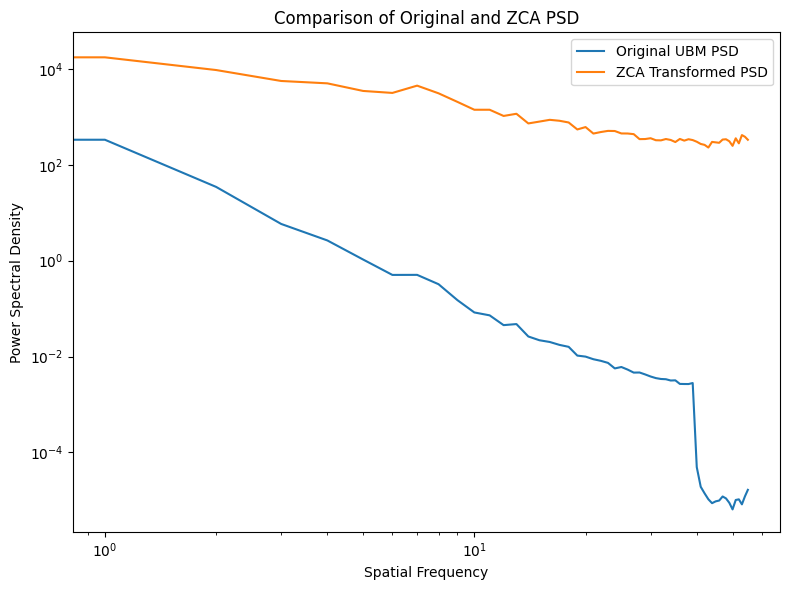

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def isotropic_psd(arr):
    """
    Compute the isotropic power spectral density (PSD) of a 2D array.
    
    Parameters:
        arr (np.ndarray): 2D input array.
    
    Returns:
        radialprofile (np.ndarray): Radially averaged PSD.
    """
    # Compute 2D FFT and shift zero frequency to center
    fft2 = np.fft.fftshift(np.fft.fft2(arr))
    psd2D = np.abs(fft2)**2
    
    # Create indices grid
    y, x = np.indices(psd2D.shape)
    center = np.array([ (x.max()-x.min())/2.0, (y.max()-y.min())/2.0 ])
    # Compute radial distance from center for each pixel
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    # Convert radius to integer bins
    r = r.astype(int)
    
    # Compute the sum of PSD values in each radial bin and count pixels per bin
    tbin = np.bincount(r.ravel(), psd2D.ravel())
    nr = np.bincount(r.ravel())
    
    # Avoid division by zero; compute the radial profile (average)
    radialprofile = tbin / (nr + np.finfo(float).eps)
    return radialprofile

# Compute isotropic PSDs for each sample
psd_original = isotropic_psd(original_sample)
psd_zca = isotropic_psd(zca_sample.values)
psd_inverted = isotropic_psd(inverted_sample)

# Frequency bins corresponding to the radial profile
freq_bins = np.arange(len(psd_original))

fig, ax = plt.subplots(figsize=(8, 6))

# Plot both PSDs on the same axes
ax.loglog(freq_bins, psd_original, label='Original UBM PSD')
ax.loglog(freq_bins, psd_zca, label='ZCA Transformed PSD')

ax.set_xlabel('Spatial Frequency')
ax.set_ylabel('Power Spectral Density')
ax.set_title('Comparison of Original and ZCA PSD')
ax.legend()

plt.tight_layout()
plt.show()


# Save Data to Cloud

In [47]:
train_ds = xr.Dataset(
    {
        "ssh": ssh_train_xr,
        "bm": bm_train_xr,
        "ubm": ubm_train_xr,
        "zca_bm": bm_zca_xr,
        "zca_ubm": ubm_zca_xr
    }
)


val_ds = xr.Dataset(
    {
        "ssh": ssh_val_xr,
        "bm": bm_val_xr,
        "ubm": ubm_val_xr,
        "zca_bm": bm_val_zca_xr,
        "zca_ubm": ubm_val_zca_xr,
    }
)


test_ds = xr.Dataset(
    {
        "ssh": ssh_test_xr,
        "bm": bm_test_xr,
        "ubm": ubm_test_xr,
        "zca_bm": bm_val_zca_xr,
        "zca_ubm": ubm_val_zca_xr,
    }
)



zca_ds = xr.Dataset(
    {
        "zca_Vt_bm": zca_Vt_xr_bm,
        "zca_scale_bm": zca_scale_xr_bm,
        "zca_mean_bm": zca_mean_xr_bm,
        "zca_Vt_ubm": zca_Vt_xr_ubm,
        "zca_scale_ubm": zca_scale_xr_ubm,
        "zca_mean_ubm": zca_mean_xr_ubm
    }
)

# train_ds_AB = xr.Dataset(
#     {
#         "ssh_A": ssh_train_xr_A,
#         "bm_A": bm_train_xr_A,
#         "ubm_A": ubm_train_xr_A,
#         "ssh_B": ssh_train_xr_B,
#         "bm_B": bm_train_xr_B,
#         "ubm_B": ubm_train_xr_B,
#     }
# )


# val_ds_AB = xr.Dataset(
#     {
#         "ssh_A": ssh_val_xr_A,
#         "bm_A": bm_val_xr_A,
#         "ubm_A": ubm_val_xr_A,
#         "ssh_B": ssh_val_xr_B,
#         "bm_B": bm_val_xr_B,
#         "ubm_B": ubm_val_xr_B,
#     }
# )


# test_ds_AB = xr.Dataset(
#     {
#         "ssh_A": ssh_test_xr_A,
#         "bm_A": bm_test_xr_A,
#         "ubm_A": ubm_test_xr_A,
#         "ssh_B": ssh_test_xr_B,
#         "bm_B": bm_test_xr_B,
#         "ubm_B": ubm_test_xr_B,
#     }
# )



In [48]:

train_ds.to_zarr("./data/train_80_extra.zarr", mode='w')
val_ds.to_zarr("./data/val_80_extra.zarr", mode='w')
test_ds.to_zarr("./data/test_80_extra.zarr", mode='w')
zca_ds.to_zarr("./data/zca_80_extra.zarr", mode='w')

# train_ds_AB.to_zarr("gs://leap-persistent/YueWang/SSH/data/train_AB.zarr", mode='w')
# val_ds_AB.to_zarr("gs://leap-persistent/YueWang/SSH/data/val_AB.zarr", mode='w')
# test_ds_AB.to_zarr("gs://leap-persistent/YueWang/SSH/data/test_AB.zarr", mode='w')

In [49]:
train_ds.to_netcdf("./data/train_80_extra.nc")
val_ds.to_netcdf("./data/val_80_extra.nc")
test_ds.to_netcdf("./data/test_80_extra.nc")
zca_ds.to_netcdf("./data/zca_80_extra.nc")

# Load Data from Cloud

In [26]:
base_path = "gs://leap-persistent/YueWang/SSH/data"

def open_zarr(path):
    return xr.open_zarr(path, consolidated=True)

train = open_zarr(f"{base_path}/train_eps3.zarr").compute()
val = open_zarr(f"{base_path}/val_eps3.zarr").compute()
test = open_zarr(f"{base_path}/test_eps3.zarr").compute()
zca = open_zarr(f"{base_path}/zca_eps3.zarr").compute()

In [29]:
t_np = train.zca_ubm.values

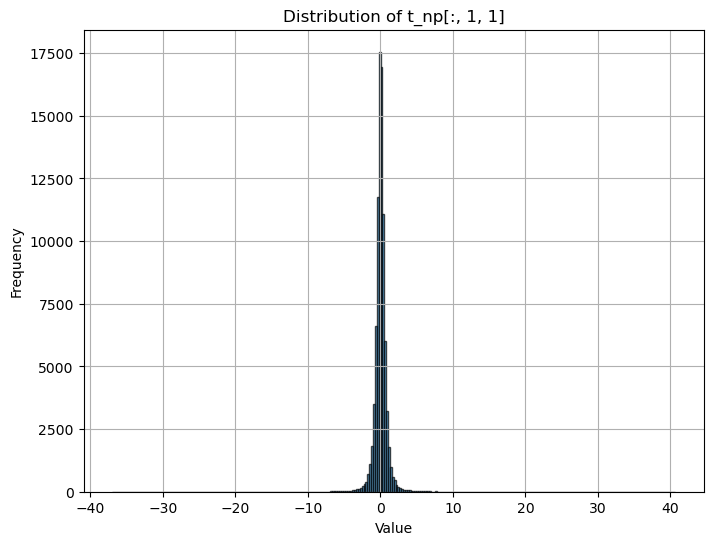

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming t_np is already defined and is a numpy array
data = t_np[:, 22, 5]

plt.figure(figsize=(8, 6))
plt.hist(data, bins=300, edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of t_np[:, 1, 1]')
plt.grid(True)
plt.show()


# Remove Data from Cloud

In [1]:
import gcsfs
fs = gcsfs.GCSFileSystem()

paths = [
   "leap-persistent/YueWang/S2S/data/lra5_subset.zarr",
   # "leap-persistent/YueWang/SSH/data/zca.zarr",
   # "leap-persistent/YueWang/SSH/data/val.zarr",
   # "leap-persistent/YueWang/SSH/data/test.zarr"
]

for path in paths:
   fs.rm(path, recursive=True)